<a href="https://colab.research.google.com/github/Umang-Lodaya/Big-Data-Bandits_Clash-Of-Codes/blob/main/Swipe_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Swipes data cleaning

In [1]:
import pandas as pd
url2="https://raw.githubusercontent.com/kushalpoddar/idyll-dummy-dataset/main/swipes.csv"
swipes=pd.read_csv(url2,low_memory=False)
swipes.head()

,id,first_like_unlike_at,first_msg,first_type,is_unmatch,like_count,p1,p1_extend_at,p2,p2_extend_at,second_like_unlike_at,second_msg,second_type,unmatch_on
0,0,2023-02-07T06:12:59.013Z,NaN,DISLIKE,False,2,2,NaN,0,NaN,2023-02-07T11:15:48.194Z,NaN,DISLIKE,NaN
1,1,2023-02-07T06:13:04.999Z,NaN,DISLIKE,False,1,2,NaN,1,NaN,NaN,NaN,NaN,NaN
2,2,2023-02-07T06:13:10.206Z,NaN,DISLIKE,False,2,2,NaN,3,NaN,2023-02-07T11:58:49.136Z,NaN,LIKE,NaN
3,3,2023-02-07T07:10:01.566Z,NaN,DISLIKE,False,1,4,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4,2023-02-07T07:10:04.391Z,NaN,DISLIKE,False,1,4,NaN,1,NaN,NaN,NaN,NaN,NaN


swipes.csv - Dataset of ~60k swipes by profiles.

id - Primary ID of the swipe or match

p1 - Primary ID of the first person performing the swipe. If A swipes B then p1 is A

p2 - Primary ID of the person who was swiped by p1. If A swipes B then p2 is B

first_type - LIKE or DISLIKE performed by p1

is_unmatch - If the match was unmatched by any user.

unmatch_on - Timestamp of unmatch

like_count - 1 if single swipe is done. 2 if both have swiped each other

second_type - LIKE or DISLIKE performed by p2 (Only present if like_count is 2) and 2nd user performed the action.

p1_extend_at and p2_extend_at are irrelevant.

In [2]:
swipes

,id,first_like_unlike_at,first_msg,first_type,is_unmatch,like_count,p1,p1_extend_at,p2,p2_extend_at,second_like_unlike_at,second_msg,second_type,unmatch_on
0,0,2023-02-07T06:12:59.013Z,NaN,DISLIKE,False,2,2,NaN,0,NaN,2023-02-07T11:15:48.194Z,NaN,DISLIKE,NaN
1,1,2023-02-07T06:13:04.999Z,NaN,DISLIKE,False,1,2,NaN,1,NaN,NaN,NaN,NaN,NaN
2,2,2023-02-07T06:13:10.206Z,NaN,DISLIKE,False,2,2,NaN,3,NaN,2023-02-07T11:58:49.136Z,NaN,LIKE,NaN
3,3,2023-02-07T07:10:01.566Z,NaN,DISLIKE,False,1,4,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4,2023-02-07T07:10:04.391Z,NaN,DISLIKE,False,1,4,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66617,66617,2023-03-03T19:42:22.828Z,NaN,LIKE,False,1,1306,NaN,1192,NaN,NaN,NaN,NaN,NaN
66618,66618,2023-03-03T19:42:25.425Z,NaN,LIKE,False,1,1306,NaN,38,NaN,NaN,NaN,NaN,NaN
66619,66619,2023-03-03T19:42:27.760Z,NaN,LIKE,False,1,1306,NaN,820,NaN,NaN,NaN,NaN,NaN
66620,66620,2023-03-03T19:42:33.602Z,NaN,DISLIKE,False,1,1306,NaN,1358,NaN,NaN,NaN,NaN,NaN


In [3]:
cols=['first_like_unlike_at','first_type','is_unmatch','like_count','p1','p2','second_like_unlike_at','second_type','unmatch_on']
swipes=swipes[cols]
swipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66622 entries, 0 to 66621
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   first_like_unlike_at   66622 non-null  object
 1   first_type             66622 non-null  object
 2   is_unmatch             66622 non-null  bool  
 3   like_count             66622 non-null  int64 
 4   p1                     66622 non-null  int64 
 5   p2                     66622 non-null  int64 
 6   second_like_unlike_at  4730 non-null   object
 7   second_type            4730 non-null   object
 8   unmatch_on             147 non-null    object
dtypes: bool(1), int64(3), object(5)
memory usage: 4.1+ MB


In [4]:
swipes['unmatch_on'].isna().sum()

66475

In [5]:
swipes.isna().sum()

first_like_unlike_at         0
first_type                   0
is_unmatch                   0
like_count                   0
p1                           0
p2                           0
second_like_unlike_at    61892
second_type              61892
unmatch_on               66475
dtype: int64

In [6]:
swipes.p1.value_counts()

11      663
1238    602
2       351
1098    318
831     276
       ... 
112       2
1192      2
1142      1
1188      1
643       1
Name: p1, Length: 1055, dtype: int64

In [7]:
swipes.p2.value_counts()

170     358
160     350
224     348
450     347
404     347
       ... 
243       1
28        1
27        1
942       1
1402      1
Name: p2, Length: 1042, dtype: int64

In [8]:
swipes.p1.isna().sum()

0

In [9]:
swipes = swipes.sort_values(by=['p1'], ascending=True)
swipes.tail()

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
66542,2023-03-03T17:58:53.994Z,LIKE,False,1,1404,940,NaN,NaN,NaN
66543,2023-03-03T17:58:57.018Z,LIKE,False,1,1404,1223,NaN,NaN,NaN
66544,2023-03-03T17:59:01.925Z,LIKE,False,1,1404,1178,NaN,NaN,NaN
66538,2023-03-03T17:58:32.798Z,LIKE,False,1,1404,938,NaN,NaN,NaN
66531,2023-03-03T17:57:59.192Z,LIKE,False,1,1404,1187,NaN,NaN,NaN


In [10]:
swipes['p1'].value_counts()


11      663
1238    602
2       351
1098    318
831     276
       ... 
20        2
112       2
1142      1
1188      1
643       1
Name: p1, Length: 1055, dtype: int64

In [11]:
swipes['p2'].value_counts()

170     358
160     350
224     348
450     347
420     347
       ... 
996       1
1060      1
988       1
102       1
1348      1
Name: p2, Length: 1042, dtype: int64

In [12]:
swipes['is_unmatch'].value_counts()

False    66475
True       147
Name: is_unmatch, dtype: int64

In [13]:
swipes[swipes['is_unmatch']==1]

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
212,2023-02-08T05:13:13.430Z,LIKE,True,2,0,35,2023-02-09T06:39:18.142Z,LIKE,2023-02-11T11:31:48.390Z
30554,2023-02-14T19:54:36.951Z,DISLIKE,True,2,2,982,2023-02-24T15:50:59.927Z,DISLIKE,2023-02-24T15:51:06.011Z
30545,2023-02-14T19:54:16.975Z,LIKE,True,2,2,1029,2023-02-15T00:36:53.312Z,LIKE,2023-02-16T17:45:39.455Z
9002,2023-02-09T13:26:31.608Z,LIKE,True,2,2,468,2023-02-10T02:21:28.070Z,LIKE,2023-02-13T19:27:37.333Z
11489,2023-02-10T06:29:50.741Z,LIKE,True,2,3,259,2023-02-10T08:52:55.902Z,LIKE,2023-02-10T09:29:00.331Z
...,...,...,...,...,...,...,...,...,...
45540,2023-02-18T17:36:26.651Z,LIKE,True,2,1252,7,2023-02-21T07:31:15.678Z,LIKE,2023-02-24T07:40:33.784Z
48233,2023-02-20T03:54:31.612Z,LIKE,True,2,1270,7,2023-02-21T07:29:20.974Z,LIKE,2023-02-23T17:06:34.654Z
54698,2023-02-22T20:41:23.734Z,LIKE,True,2,1306,1238,2023-02-24T11:41:18.643Z,LIKE,2023-03-02T07:41:35.831Z
54700,2023-02-22T20:41:35.524Z,LIKE,True,2,1306,1227,2023-02-26T08:09:45.056Z,LIKE,2023-03-02T07:41:11.864Z


In [14]:
swipes['unmatch_on'] = pd.to_datetime(swipes['unmatch_on'])
swipes['first_like_unlike_at'] = pd.to_datetime(swipes['first_like_unlike_at'])
swipes['second_like_unlike_at'] = pd.to_datetime(swipes['second_like_unlike_at'])
swipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66622 entries, 713 to 66531
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   first_like_unlike_at   66622 non-null  datetime64[ns, UTC]
 1   first_type             66622 non-null  object             
 2   is_unmatch             66622 non-null  bool               
 3   like_count             66622 non-null  int64              
 4   p1                     66622 non-null  int64              
 5   p2                     66622 non-null  int64              
 6   second_like_unlike_at  4730 non-null   datetime64[ns, UTC]
 7   second_type            4730 non-null   object             
 8   unmatch_on             147 non-null    datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](3), int64(3), object(2)
memory usage: 4.6+ MB


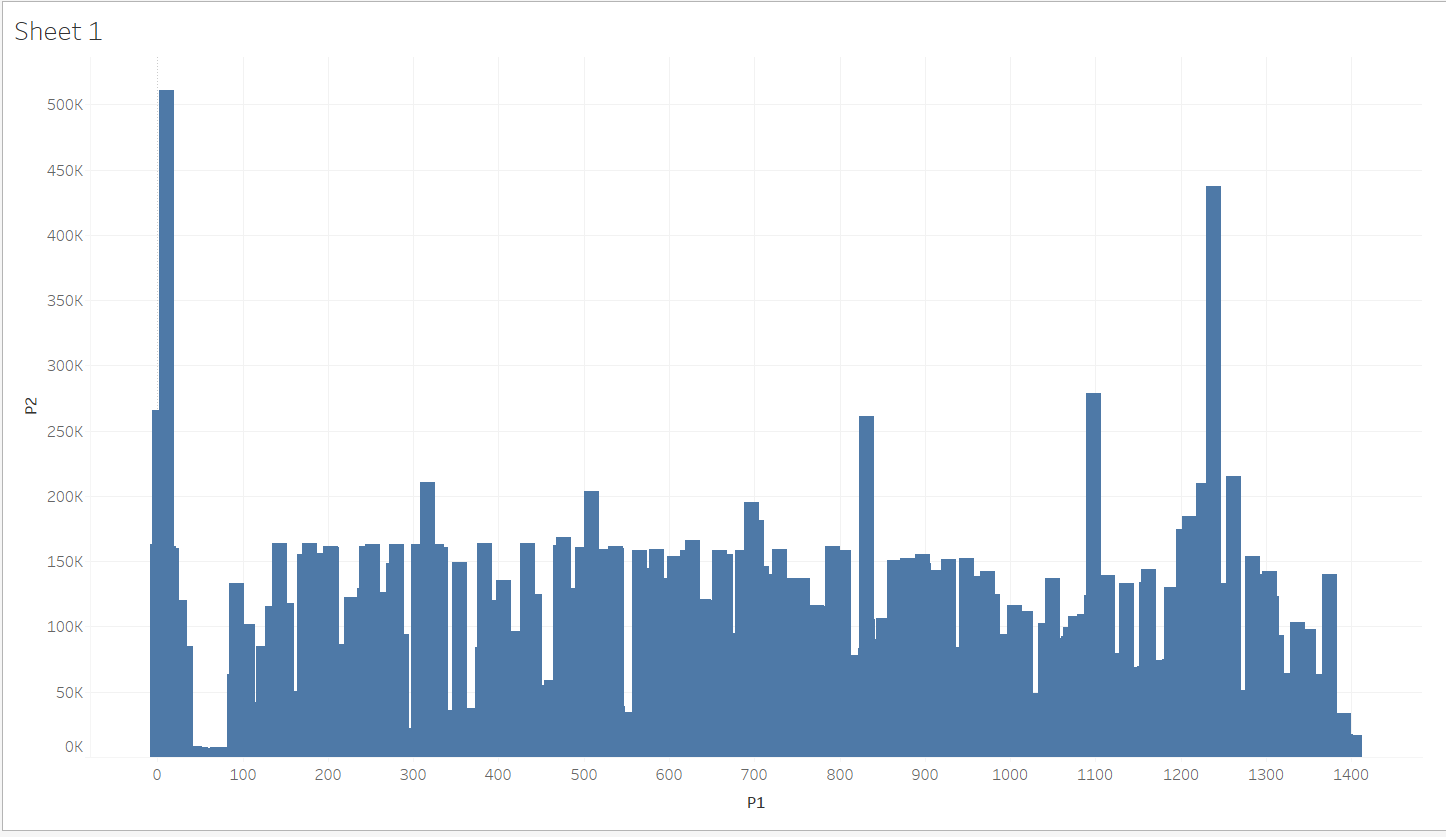

In [15]:
swipes['first_type'].value_counts()

DISLIKE    38922
LIKE       27700
Name: first_type, dtype: int64

In [16]:
swipes['second_type'].value_counts()

DISLIKE    2671
LIKE       2059
Name: second_type, dtype: int64

In [17]:
swipes[~swipes['second_type'].isnull()]

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
30580,2023-02-14 19:56:04.289000+00:00,LIKE,False,2,0,1037,2023-02-15 20:18:16.299000+00:00,DISLIKE,NaT
30586,2023-02-14 19:56:28.993000+00:00,LIKE,False,2,0,939,2023-02-18 12:11:03.193000+00:00,DISLIKE,NaT
30550,2023-02-14 19:54:28.629000+00:00,LIKE,False,2,0,1036,2023-02-15 03:05:59.342000+00:00,DISLIKE,NaT
277,2023-02-08 08:02:41.872000+00:00,LIKE,False,2,0,53,2023-02-09 06:51:03.729000+00:00,LIKE,NaT
273,2023-02-08 08:02:10.940000+00:00,LIKE,False,2,0,49,2023-02-09 06:49:30.376000+00:00,LIKE,NaT
...,...,...,...,...,...,...,...,...,...
64926,2023-03-01 18:55:27.348000+00:00,LIKE,False,2,1387,1290,2023-03-03 05:51:06.041000+00:00,DISLIKE,NaT
65334,2023-03-02 08:23:19.709000+00:00,LIKE,False,2,1387,1210,2023-03-03 19:10:25.536000+00:00,DISLIKE,NaT
65808,2023-03-03 00:17:31.977000+00:00,DISLIKE,False,2,1391,1238,2023-03-03 04:32:33.755000+00:00,DISLIKE,NaT
65452,2023-03-02 12:08:25.155000+00:00,DISLIKE,False,2,1393,1238,2023-03-03 04:32:31.485000+00:00,DISLIKE,NaT
